In [1]:
import os
# os.environ['DEVICE_ID'] = '0'
import numpy as np

import mindspore as ms
from mindspore import nn
from mindspore import context

context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

In [2]:
# Generating samples data based on a linear function and add a few perturbation
x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x +  0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)

In [3]:
# Use nn.Dense(1, 1) operator provided by MindSpore as the linear model,
# (1, 1) indicates that the input and output of the linear model are both 1 dimension,
# y = w*x + b, w is a 1x1 matrix. The operator randomly initializes the weight w and offset b.
# Use the mean squared error (MSE) as the loss function.
# Use Stochastic Gradient Descent (SGD) to optimize the model.
net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

In [4]:
# Use samples to train the model for several epochs
for epoch in range(20):
    loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
    print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 0, loss is 199.84312
epoch: 1, loss is 143.35913
epoch: 2, loss is 103.17047
epoch: 3, loss is 74.55795
epoch: 4, loss is 54.186066
epoch: 5, loss is 39.67797
epoch: 6, loss is 29.365372
epoch: 7, loss is 21.987782
epoch: 8, loss is 16.751898
epoch: 9, loss is 13.022314
epoch: 10, loss is 10.39259
epoch: 11, loss is 8.48236
epoch: 12, loss is 7.132765
epoch: 13, loss is 6.177033
epoch: 14, loss is 5.4937124
epoch: 15, loss is 4.9959164
epoch: 16, loss is 4.6429567
epoch: 17, loss is 4.400611
epoch: 18, loss is 4.226562
epoch: 19, loss is 4.1051607


In [5]:
# After training a certain epochs, the model obtained is very close to the real linear function.
wb = [x.default_input.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))

for i in range(-10, 11, 5):
    print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = -5 * x + 0.1
The trained linear model is y = -4.841301441192627 * x + 0.12395425140857697
x = -10, predicted y = [[48.522392]]
x = -5, predicted y = [[24.323174]]
x = 0, predicted y = [[0.12395425]]
x = 5, predicted y = [[-24.075264]]
x = 10, predicted y = [[-48.274483]]


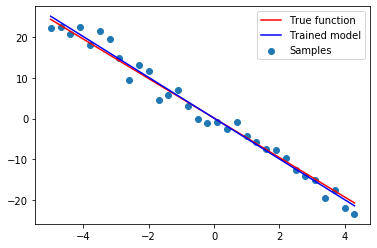

In [6]:
# Plot the samples data,the true linear function and the trained model we obtained 
from matplotlib import pyplot as plt
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x +  b, c='r', label='True function')
plt.plot(x, -5 * x +  0.1, c='b', label='Trained model')
plt.legend()